# <center>Coms 574</center>
# <center>HW 1</center>
# <center>Kanak Choudhury</center>

# Problem 1:

## (a) 


In [221]:
path = '';

%matplotlib inline
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import math
import random
import warnings

#ignore by message
warnings.filterwarnings("ignore", message="Polyfit may be poorly conditioned")

In [222]:
import warnings
warnings.filterwarnings("ignore", message="divide by zero encountered in log")
warnings.filterwarnings("ignore", message="invalid value encountered in multiply")
# warnings.filterwarnings("ignore", message="Polyfit may be poorly conditioned")


X = np.array([0, 5, 8, 12]).reshape(-1,1)
Y = np.array([10, 5, 12, 0])
lm = linear_model.LinearRegression()
X = PolynomialFeatures(degree=3).fit_transform(X)
model = lm.fit(X, Y)
print("Y^ = %.4f + (%.4f * X) + (%.4f * X^2) + (%.4f * X^3)" 
      %(model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3]))

Y^ = 0.0000 + (-7.0119 * X) + (1.6935 * X^2) + (-0.0982 * X^3)


## (b) 


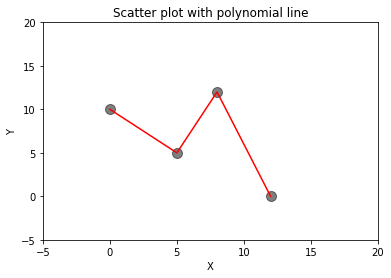

In [223]:
# Xnew = np.arange(-5, 20).reshape(-1,1)
# pred = model.predict(PolynomialFeatures(degree=3).fit_transform(Xnew))
pred = model.predict(X)
plt.scatter(X[:,1], Y, alpha=0.5, facecolors='black', edgecolors='black', s=100)
plt.plot(X[:,1], pred, color = 'red')
plt.title('Scatter plot with polynomial line')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-5,20)
plt.xlim(-5,20)
plt.show()


## (c)

Loss function defines how well the model fits the data. MSE loss function minimizes average squared error that is average squared deviation of data from the regression line. Different loss function minimizes different objective function. For example, if we consider MAE (mean absolute error), we may get different coefficient that is different polynomial. 

## (d)


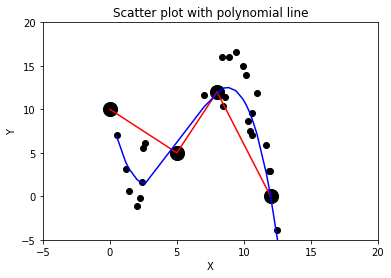

In [224]:
np.random.seed(1234657)
nsample = 30
xnew = np.random.uniform(0, 15, nsample).reshape(-1,1)
error = np.random.normal(0, math.sqrt(10), nsample)
ynewhat = model.predict(PolynomialFeatures(degree = 3).fit_transform(xnew))
ynew = np.add(ynewhat, error)
# keydict = dict(zip(xnew.reshape(30), ynewhat))
plt.scatter(X[:,1], Y,  color = 'black', s=200)
plt.plot(X[:,1], pred, color = 'red')
plt.plot(sorted(xnew), list(zip(*sorted(zip(xnew.reshape(nsample),ynewhat))))[1], color = 'blue')
plt.scatter(xnew, ynew, color = 'black')
plt.title('Scatter plot with polynomial line')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-5,20)
plt.xlim(-5,20)
plt.show()


## (e)

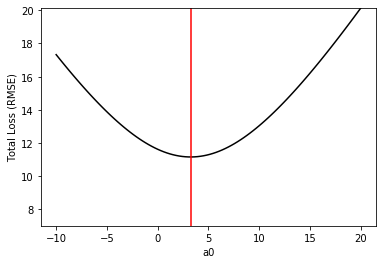

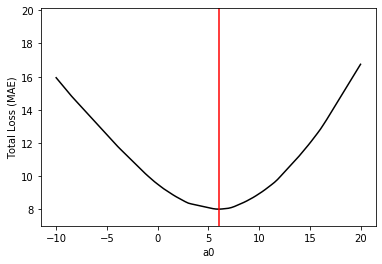

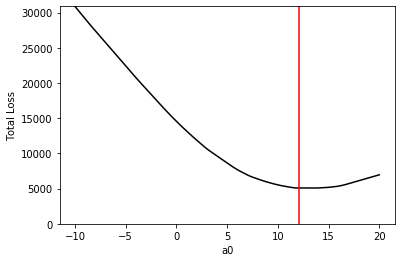

In [225]:
na0 = 100
a0 = np.linspace(-10, 20, na0)
def sqloss(y, yhat):
    return(np.mean((y-yhat)**2))
    
def absloss(y, yhat):
    return(np.mean(np.absolute(y-yhat)))

    
def specialloss(y, yhat, x):
    n = np.size(y)
    nyhat = np.size(yhat)
    nx = np.size(x)
    if nyhat == 1:
        yhat = np.repeat(yhat, n)
    if n == np.size(yhat):
        err = y - yhat
        err[err<0] = err[err<0]*(-1/5)
        err[err>=0] = err[err>=0]*10
        loss = np.sum(err / (abs(x-5)+0.01))
        return(loss)
    else:
        print("dimension of y or yhat is not correct")
        return()

    
loss = np.zeros(shape = (na0, 3))
loss = []
for i in range(0, na0):
    loss.append([sqloss(ynew, a0[i]), absloss(ynew, a0[i]), specialloss(ynew, a0[i], xnew)])
    
loss = np.array(loss)
plt.plot(a0, np.sqrt(loss[:,0].astype(np.float64)),  color = 'black')
plt.plot([a0[np.argmin(loss[:,0])], a0[np.argmin(loss[:,0])]], [0, 30],  color = 'red')
# plt.plot(a0, loss[:,2],  color = 'green')
plt.ylabel('Total Loss (RMSE)')
plt.xlabel('a0')
plt.ylim(7,np.max([np.sqrt(np.max(loss[:,0])), np.max(loss[:,1])]))
plt.show()
plt.plot(a0, loss[:,1],  color = 'black')
plt.plot([a0[np.argmin(loss[:,1])], a0[np.argmin(loss[:,1])]], [0, 30],  color = 'red')
plt.ylabel('Total Loss (MAE)')
plt.xlabel('a0')
plt.ylim(7,np.max([np.sqrt(np.max(loss[:,0])), np.max(loss[:,1])]))
plt.show()
plt.plot(a0, loss[:,2],  color = 'black')
plt.plot([a0[np.argmin(loss[:,2])], a0[np.argmin(loss[:,2])]], [0, 50000],  color = 'red')
plt.ylabel('Total Loss')
plt.xlabel('a0')
plt.ylim(0,np.max(loss[:,2]))
plt.show()

## (f)

Note: Red lines in the above plots indicate the minimized value for the loss function. For the training loss, I have used RMSE to have the same unite as MAE, so that we can compare.

It is difficult to say whether these loss functions over-estimating or under estimating y values. It depends on objective of using loss function. For example, if data contains large number of outliers, then MSE loss function overestimate y values. Because MSE minimizes data around the mean and mean affects by the outliers. In such cases MAE would be a good choice for the estimation. The third loss function puts more weights on the positive error compare to negative error. So, this type of loos function is good if our objective is to estimate or predict large values of the data set.

It is difficult to say whether the loss function put more emphasis or less emphasis on points close to $x = 5$. It depends on mean and median of $y$ values. MSE loss function put more emphasis around the conditional mean of $y$ and MAE loss function puts more emphasis around the conditional median of $y$. 

## (g)

In [226]:
ymean = np.mean(ynew)
ymedian = np.median(ynew)
print("Mean and Median of Y are %.3f, %.3f" %(ymean, ymedian))

Mean and Median of Y are 3.258, 6.013


MSE minimizes around the mean of $y$ and MAE minimizes around the median of $y$. MAE loss function penalize less on the extreme values. However, MSE loss function penalize more on the extreme values.

## (h)

### (i), (ii) and (iv)

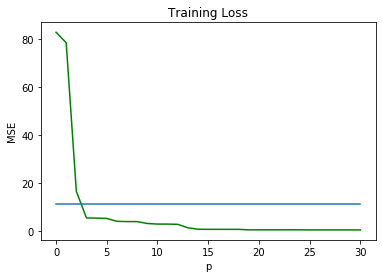

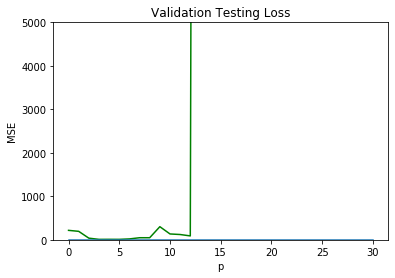

In [227]:
nn = 20
p = 30

xtrain = xnew[0:nn]
xtest = xnew[nn:nsample]
ytrain = ynew[0:nn]
ytest = ynew[nn:nsample]

xx1 = PolynomialFeatures(degree = 3).fit_transform(xtrain)
predtrain = model.predict(xx1)
groud_mse_tr = sqloss(ytrain, predtrain)

xx2 = PolynomialFeatures(degree = 3).fit_transform(xtest)
predtest = model.predict(xx2)
groud_mse_ts = np.mean((ytest - predtest)**2)


prange = range(0,p+1)
sqlossval_tr = np.zeros(p+1)
sqlossval_ts = np.zeros(p+1)



for j in prange:
    model_1 = np.polyfit(xtrain.reshape(nn), ytrain, j)
    ytrainhat_tr = np.polyval(model_1, xtrain.reshape(nn))
    ytrainhat_ts = np.polyval(model_1, xtest.reshape(10))
    sqlossval_tr[j] = sqloss(ytrain,  ytrainhat_tr)
    sqlossval_ts[j] = sqloss(ytest, ytrainhat_ts)

plt.plot(prange, sqlossval_tr,  color = 'green')
plt.plot([0,p], [groud_mse_tr, groud_mse_tr])
plt.title('Training Loss')
plt.ylabel('MSE')
plt.xlabel('p')
# plt.ylim(0,5)
plt.show()

plt.plot(prange, sqlossval_ts,  color = 'green')
plt.plot([0,p], [groud_mse_ts, groud_mse_ts])
plt.title('Validation Testing Loss')
plt.ylabel('MSE')
plt.xlabel('p')
plt.ylim(0, 5000)
plt.show()



### (iii) and (v)

Note that validation loss plot axis has been truncated to have a better look.

From the training loss curve, training loss decreases as the order of the polynomial increases and it goes to 0 after 19th order polynomial because we have used only 20 observations. There is a steep downward slope until 3rd order polynomial after it has a shallow slope because we have generated data from 3rd order polynomial.


For the validation loss curve, I have truncated $y$-axis to have a better look of the plot. From the plot, minimum testing loss is at 3rd order polynomial. Plot look like $U$ shape. That is, test loss always higher for all polynomials except 3rd order. The difference between the training loss and validation loss curve is that training loss always decreases as the order of polynomial increases, but it is not same for validation loss.


### (vi)

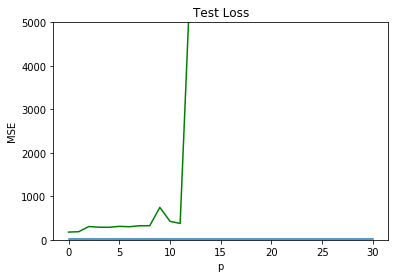

In [228]:
np.random.seed(9876)
nnew_test = 1000
nn = 20
xnew_test = np.random.uniform(0, 15, nnew_test).reshape(-1,1)
error1 = np.random.normal(0, math.sqrt(10), nnew_test)
ynewhat_test = model.predict(PolynomialFeatures(degree = 3).fit_transform(xnew_test))
ynew_test = np.add(ynewhat_test, error1)

prange = range(0,p+1)
sqlossval_tr = np.zeros(p+1)
sqlossval_test = np.zeros(p+1)

for j in prange:
    model_1 = np.polyfit(xtrain.reshape(nn), ytrain, j)
    ytrainhat_tr = np.polyval(model_1, xtrain.reshape(nn))
    ytrainhat_ts = np.polyval(model_1, xnew_test)
    sqlossval_tr[j] = sqloss(ytrain,  ytrainhat_tr)
    sqlossval_test[j] = sqloss(ynew_test, ytrainhat_ts)


xx2 = PolynomialFeatures(degree = 3).fit_transform(xnew_test)
predt_test = model.predict(xx2)
groud_mse_test = sqloss(ynew_test, predt_test)

plt.plot(prange, sqlossval_test,  color = 'green')
plt.plot([0,p], [groud_mse_test, groud_mse_test])
plt.title('Test Loss')
plt.ylabel('MSE')
plt.xlabel('p')
plt.ylim(0, 5000)
plt.show()


### (vii)

Note that test loss plot axis has been truncated to have a better look.

Though the testing loss plot and validation loss plot look similar but closer look shows different results. For the test loss minimum loss found for polynomial order 0. However, for the validation loss, minimum loss found for polynomial order 3. Also, average testing loss is higher than training and validation loss. It indicates that even if we find a good model based on training and validation loss function does not guarantee to have same total loss on the test data. 

### (viii)

$\lambda$ Value:

$$TC\left (p=0\right ) = TC\left (p=30\right )$$

$$MSE\left (0\right ) + \lambda * 0 = MSE\left (30\right ) + \lambda * 30$$

$$\lambda = \frac{MSE\left (0\right ) - MSE\left (30\right )}{30}$$

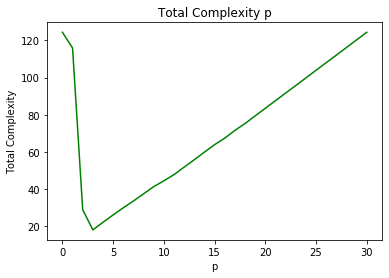

In [229]:
nn= 30
prange = range(0,p+1)
mse_loss_tr = np.zeros(p+1)



for j in prange:
    model_1 = np.polyfit(xnew.reshape(nn), ynew, j)
    ytrainhat_tr = np.polyval(model_1, xnew.reshape(nn))
    mse_loss_tr[j] = sqloss(ynew,  ytrainhat_tr)
    
lambda_v = (mse_loss_tr[0] - mse_loss_tr[p])/p
comx_loss_tr = mse_loss_tr + np.array(np.arange(0, p+1, 1)) * lambda_v

plt.plot(prange, comx_loss_tr,  color = 'green')
plt.title('Total Complexity p')
plt.ylabel('Total Complexity')
plt.xlabel('p')
# plt.ylim(0,5)
plt.show()

Based on this total complexity loss function, the minimum loss found for polynomial of order 3 that is same as the ground truth model. We also found the same for validation MSE. However, training MSE shows that more complex model has lower MSE.

### ix.

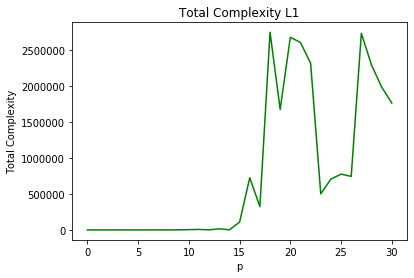

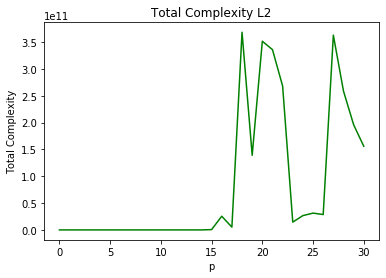

Using L1 and L2 penalty, minimum loss found for polynomial order 3 and 1


In [230]:
p = 30
nn=30
prange = range(0,p+1)
l1loss = np.zeros(p+1)
l2loss = np.zeros(p+1)

for j in prange:
    model_1 = np.polyfit(xnew.reshape(nn), ynew, j)
    ytrainhat_tr = np.polyval(model_1, xnew.reshape(nn))
    l1loss[j] = sqloss(ynew,  ytrainhat_tr) + lambda_v * np.sum(abs(model_1[0:j]))
    l2loss[j] = sqloss(ynew,  ytrainhat_tr) + lambda_v * np.sum(model_1[0:j]**2)


plt.plot(prange, l1loss,  color = 'green')
plt.title('Total Complexity L1')
plt.ylabel('Total Complexity')
plt.xlabel('p')
# plt.ylim(0,5000)
plt.show()

plt.plot(prange, l2loss,  color = 'green')
plt.title('Total Complexity L2')
plt.ylabel('Total Complexity')
plt.xlabel('p')
# plt.ylim(0,5000)
plt.show()

print("Using L1 and L2 penalty, minimum loss found for polynomial order %d and %d" %(np.argmin(l1loss), np.argmin(l2loss)))

Note: intercept value for every order polynomial did not include in the penalty.

As the model complexity increases, these methods add more penalty in the total loss. The best model found for L1 penalty is the 3rd order polynomial which is our ground truth model and for L2 penalty 1st order polynomial is the best. It is also found similar pattern from the validation loss. However, based on test loss, 0th order polynomial found the best. It is important to mention that because of penalty factor training loss does not always go down.

## (i)

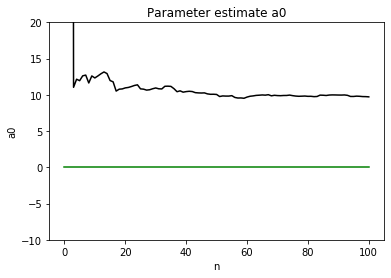

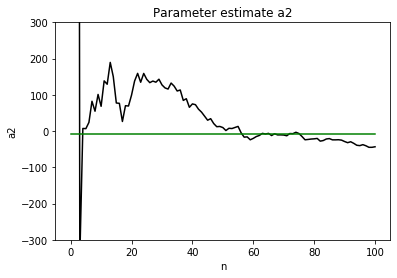

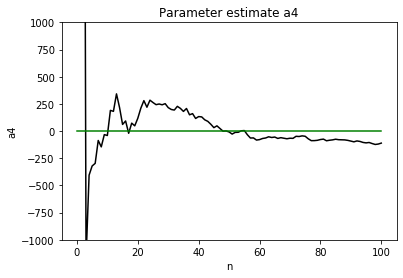

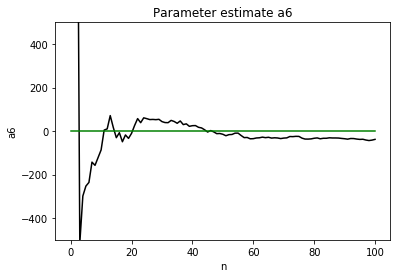

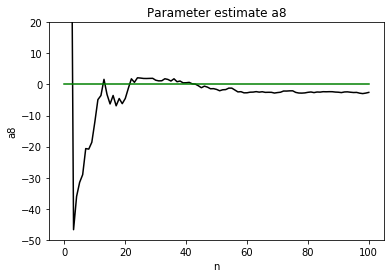

In [231]:
np.random.seed(9876)
nnew_test = 5000
xnew_large = np.random.uniform(0, 15, nnew_test).reshape(-1,1)
error1 = np.random.normal(0, math.sqrt(10), nnew_test)
ynewhat_large = model.predict(PolynomialFeatures(degree = 3).fit_transform(xnew_large))
ynew_large = np.add(ynewhat_large, error1)

prange = range(1,101)
prem = []
for i in prange:
    model_1 = np.polyfit(xnew_large[0:(i*50)].reshape(i*50), ynew_large[0:(i*50)], 30)
    prem.append(model_1[np.array([30, 28, 26, 24, 22])])

prem = np.array(prem)
prem_ground = model.coef_

plt.plot(prange, prem[:,0],  color = 'black')
plt.plot([0,100], [prem_ground[0], prem_ground[0]], color = 'green')
plt.title('Parameter estimate a0')
plt.ylabel('a0')
plt.xlabel('n')
plt.ylim(-10,20)
plt.show()

plt.plot(prange, prem[:,1],  color = 'black')
plt.plot([0,100], [prem_ground[1], prem_ground[1]], color = 'green')
plt.title('Parameter estimate a2')
plt.ylabel('a2')
plt.xlabel('n')
plt.ylim(-300,300)
plt.show()


plt.plot(prange, prem[:,2],  color = 'black')
plt.plot([0,100], [0,0], color = 'green')
plt.title('Parameter estimate a4')
plt.ylabel('a4')
plt.xlabel('n')
plt.ylim(-1000,1000)
plt.show()

plt.plot(prange, prem[:,3],  color = 'black')
plt.plot([0,100], [0,0], color = 'green')
plt.title('Parameter estimate a6')
plt.ylabel('a6')
plt.xlabel('n')
plt.ylim(-500,500)
plt.show()

plt.plot(prange, prem[:,4],  color = 'black')
plt.plot([0,100], [0,0], color = 'green')
plt.title('Parameter estimate a8')
plt.ylabel('a8')
plt.xlabel('n')
plt.ylim(-50,20)
plt.show()



It is clear from these plots that for large sample these parameter estimates are consistent. For small samples there are very high volatility of the parameter estimates. For this data set, as the sample size increases, parameter estimates become close to true estimate. It is important to mention that we have estimated 30th order model using data generated from 3rd order model as a result we are getting some difference from the true values (green line) that may contribute to the overfitting. It also indicate that as the model complexity increases, we need more data to have a consistent estimate of the parameters.